<a href="https://colab.research.google.com/github/manojs9/Data-Analytics-Projects/blob/main/Aerofit_CaseStudy_ManojSrivastava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import norm, poisson, binom, expon, geom
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('aerofit_treadmill.csv')
df

Saving aerofit_treadmill.csv to aerofit_treadmill.csv


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
len(df)

180

In [ ]:
df.describe(include='all' )

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
df.nunique(0)

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


In [ ]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [ ]:
#statistical summary of data
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df['Age'].value_counts()

,count
Age,
25,25
23,18
24,12
26,12
28,9
35,8
33,8
30,7
38,7


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [ ]:
df['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [ ]:
df['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
df['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [ ]:
df['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [ ]:
print(df['Age'].min())
print(df['Age'].max())

18
50


In [ ]:
#adding Age category as column
age_range = [17,25,35,45,55]
age_labels = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

df['age_group'] = pd.cut(df['Age'],bins = age_range,labels = age_labels)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle Aged Adults
176,KP781,42,Male,18,Single,5,4,89641,200,Middle Aged Adults
177,KP781,45,Male,16,Single,5,5,90886,160,Middle Aged Adults
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elder


In [ ]:
print(df['Education'].min(), df['Education'].max())

12 21


In [ ]:
# adding column for education category
education_range = [0,12,15,22]
education_labels = ['Primary Education', 'Secondary Education', 'Higher Education']
df['education_group'] = pd.cut(df['Education'],bins = education_range,labels = education_labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,education_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education


In [ ]:
print(df['Income'].min(), df['Income'].max())

29562 104581


In [ ]:
#adding column for income values into categories
income_range = [0,40000,60000,80000,105000]
income_labels = ['Low Income','Moderate Income','High Income','Very High Income']

df['income_group'] = pd.cut(df['Income'],bins = income_range,labels = income_labels)

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,education_group,income_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income


In [ ]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,education_group,income_group
175,KP781,40,Male,21,Single,6,5,83416,200,Middle Aged Adults,Higher Education,Very High Income
176,KP781,42,Male,18,Single,5,4,89641,200,Middle Aged Adults,Higher Education,Very High Income
177,KP781,45,Male,16,Single,5,5,90886,160,Middle Aged Adults,Higher Education,Very High Income
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elder,Higher Education,Very High Income
179,KP781,48,Male,18,Partnered,4,5,95508,180,Elder,Higher Education,Very High Income


In [ ]:
print(df['Miles'].min(), df['Miles'].max())

21 360


In [ ]:
# added column for running miles values into categories
miles_range = [0,50,100,200,365]
miles_labels = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']

df['miles_group'] = pd.cut(df['Miles'],bins = miles_range,labels = miles_labels)

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,education_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


In [ ]:
df_final = df
df_final.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,education_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


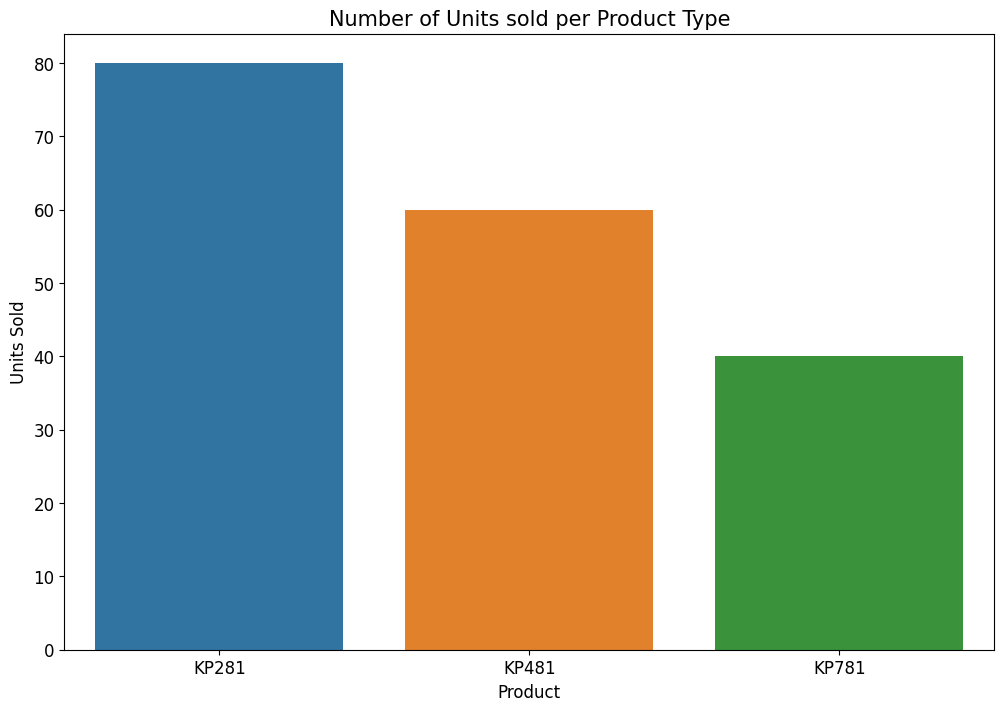

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Product',data=df_final, hue= 'Product')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Units sold per Product Type', fontsize=15)
plt.show()


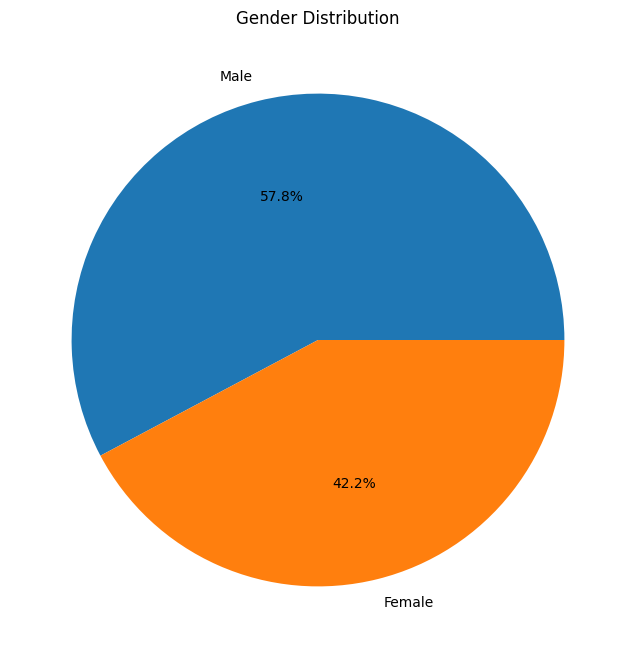

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(df_final['Gender'].value_counts(),labels=df_final['Gender'].value_counts().index,autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()


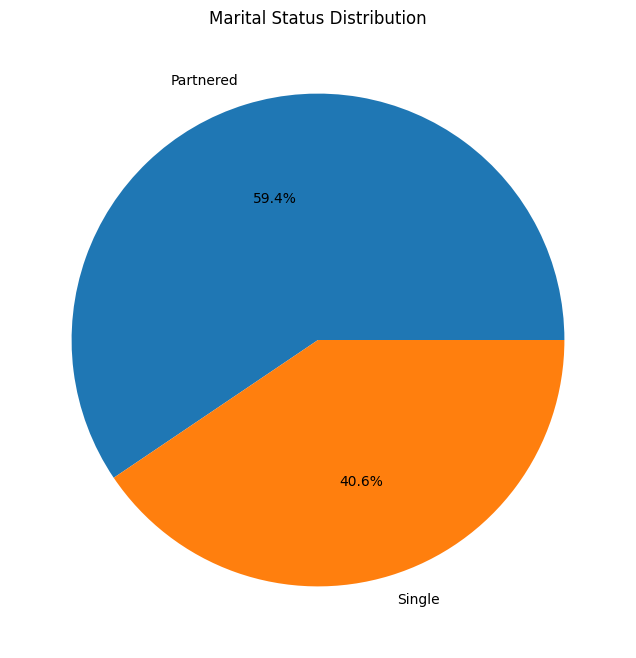

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(df_final['MaritalStatus'].value_counts(),labels=df_final['MaritalStatus'].value_counts().index,autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.show()


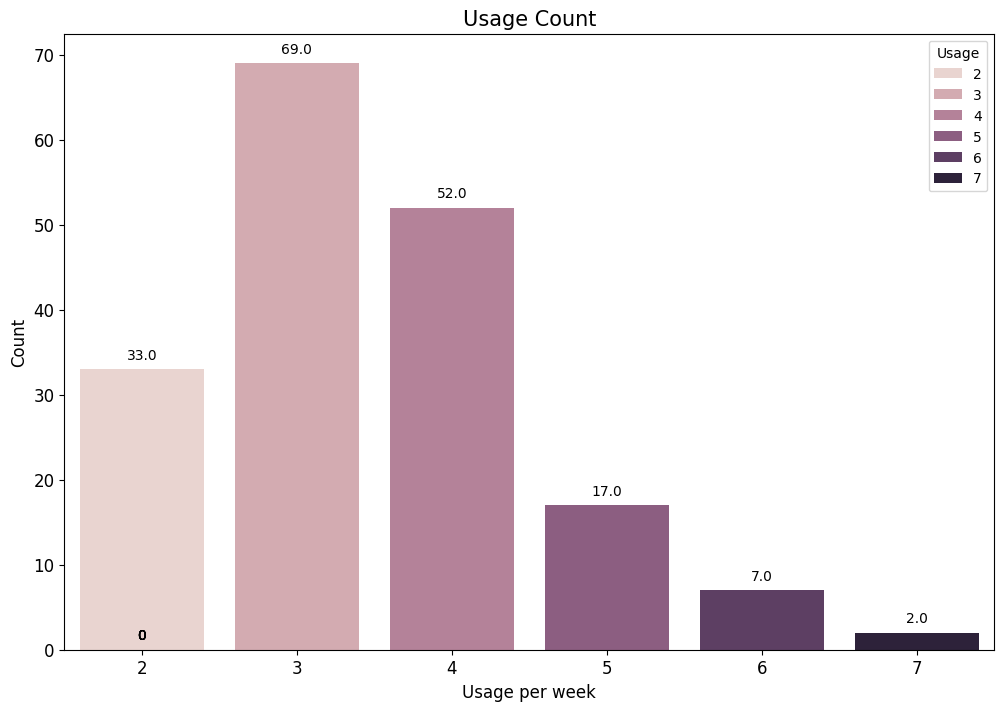

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Usage',data=df_final, hue= 'Usage')
plt.xlabel('Usage per week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Usage Count', fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()


In [ ]:
#Insights
# Majority of user have a usage between 2 to 4 times a week
# Number of Users with 2 to 4 times Usage per week = (33 + 67 + 52) = 152

Percentage_of_User_with_Usage_between_2_to_4 = round((152/len(df_final))*100, 1)
print(Percentage_of_User_with_Usage_between_2_to_4)

84.4


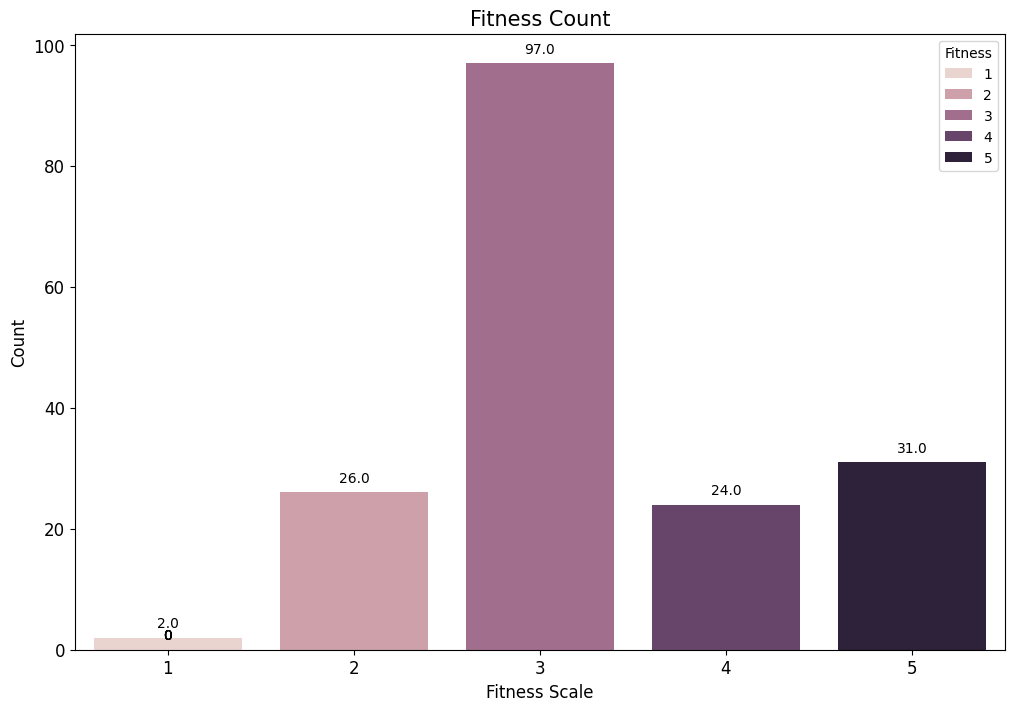

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Fitness',data=df_final, hue= 'Fitness')
plt.xlabel('Fitness Scale', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Fitness Count', fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
#Insights
# 97 users out of 180 have evaluated themselves as 3 on fitness scale
# 152 users out of 180 have evaluated themselves as >= 3 on fitness scale

x = round((97/len(df_final))*100,1)
y = round((152/len(df_final))*100,1)
print(x,y)

53.9 84.4


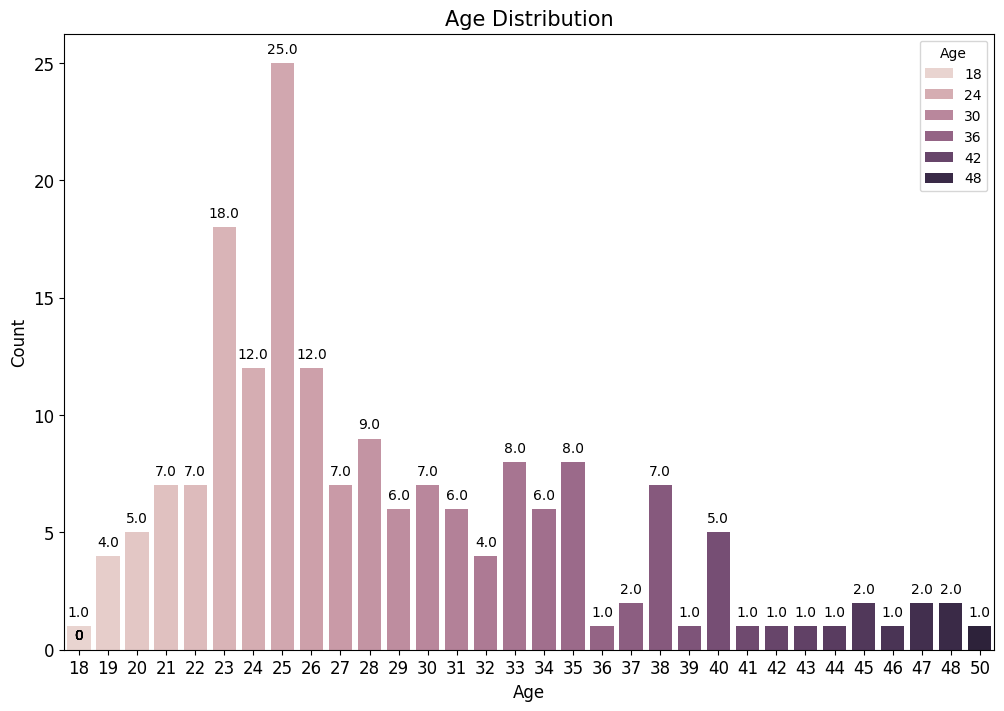

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Age',data=df_final, hue= 'Age')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Age Distribution', fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

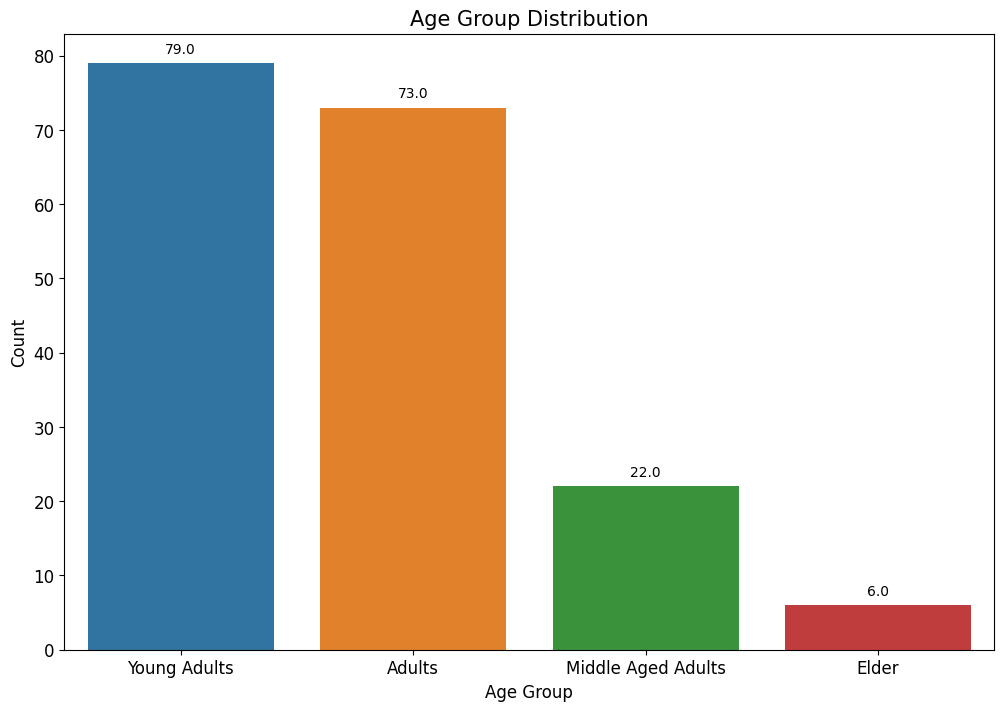

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='age_group',data=df_final, hue= 'age_group')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Age Group Distribution', fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
#Insights
# 152 users are from the age group of 18 to 35 (Young Adults(18-25) and Adults (25-35))
Percentage_of_adults = round((152/len(df_final))*100,1)
print(Percentage_of_adults)

84.4


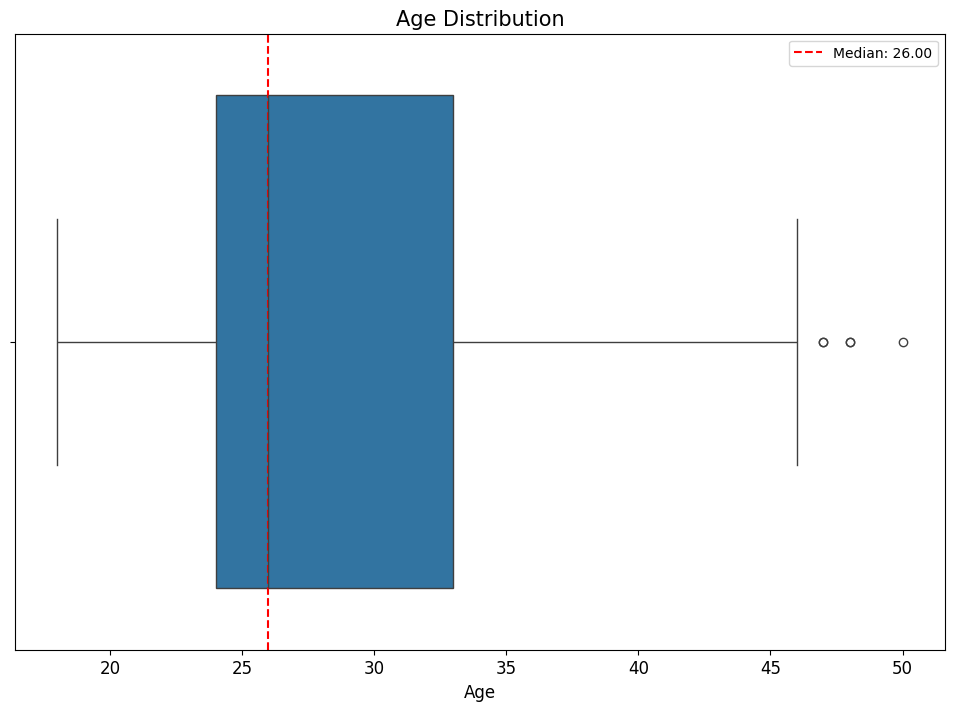

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Age',data=df_final)
plt.xlabel('Age', fontsize=12)

# Calculate the mean of the 'Age' column
age_median = df_final['Age'].median()

# Display the mean on the plot using axvline
plt.axvline(age_median, color='r', linestyle='--', label=f'Median: {age_median:.2f}')
plt.legend() # Show the legend

plt.xticks(fontsize=12)
plt.title('Age Distribution', fontsize=15)
plt.show()

In [ ]:
#Insights : 3 outliers in data

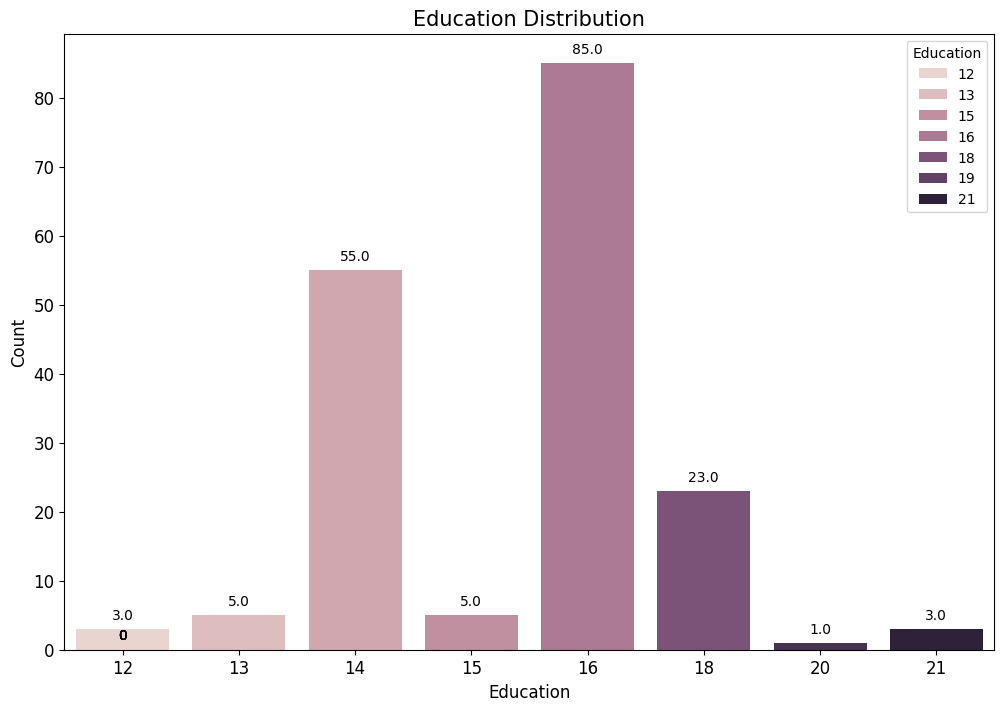

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Education',data=df_final, hue= 'Education')
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Education Distribution', fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
#Insights
# 172 User have more than 13 years of education
Percentage_of_education_more_or_equal_to_13 = round((177/len(df_final))*100,1)
print(Percentage_of_education_more_or_equal_to_13)

98.3


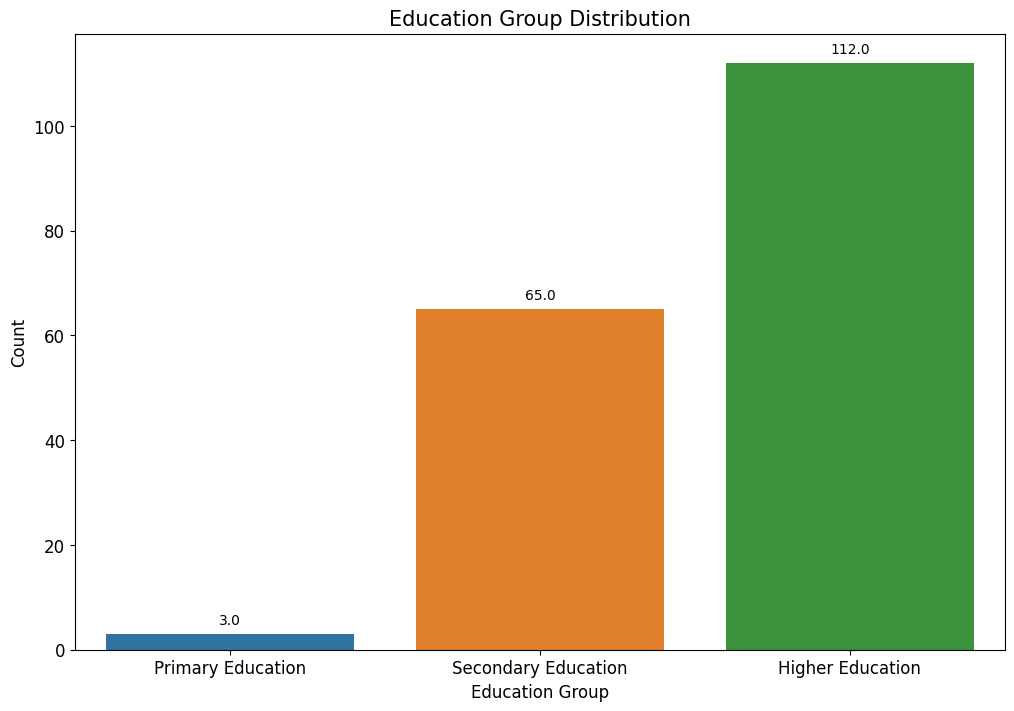

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='education_group',data=df_final, hue= 'education_group')
plt.xlabel('Education Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Education Group Distribution', fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

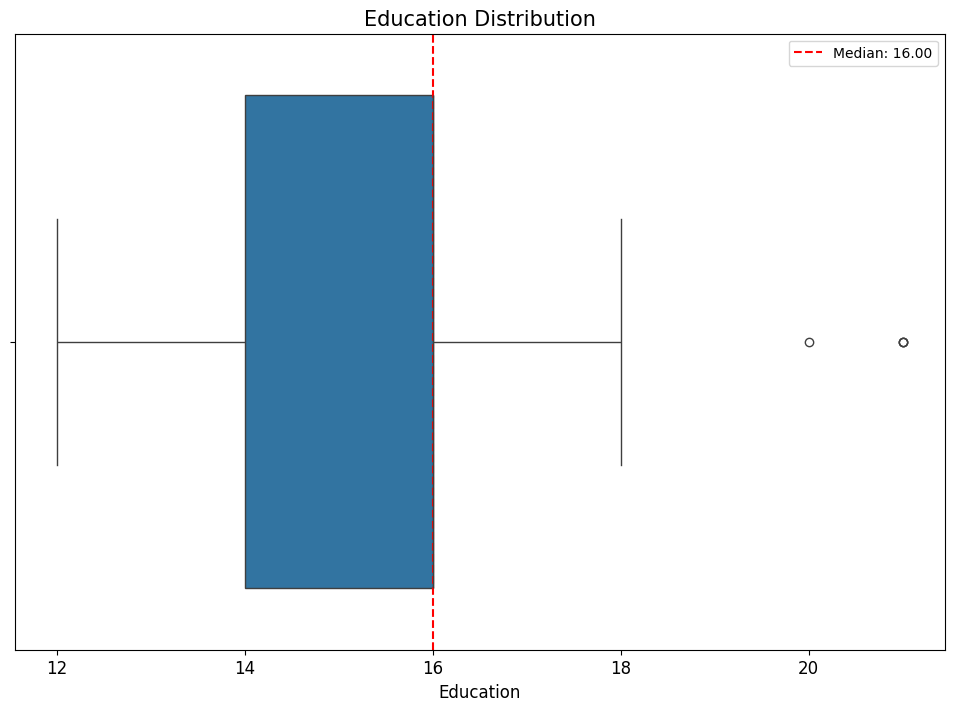

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Education',data=df_final)
plt.xlabel('Education', fontsize=12)

# Calculate the mean of the 'Education' column
edu_median = df_final['Education'].median()

# Display the mean on the plot using axvline
plt.axvline(edu_median, color='r', linestyle='--', label=f'Median: {edu_median:.2f}')
plt.legend() # Show the legend

plt.xticks(fontsize=12)
plt.title('Education Distribution', fontsize=15)
plt.show()

In [ ]:
# Insights : 2 outliers in education data

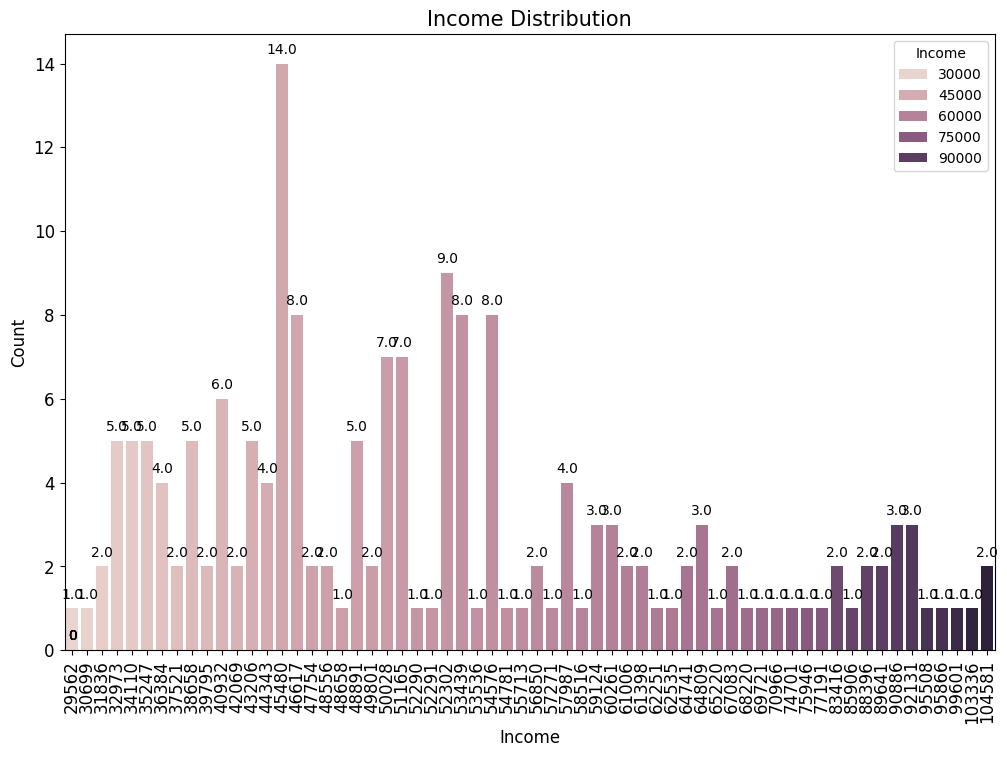

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Income',data=df_final, hue= 'Income')
plt.xlabel('Income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.title('Income Distribution', fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

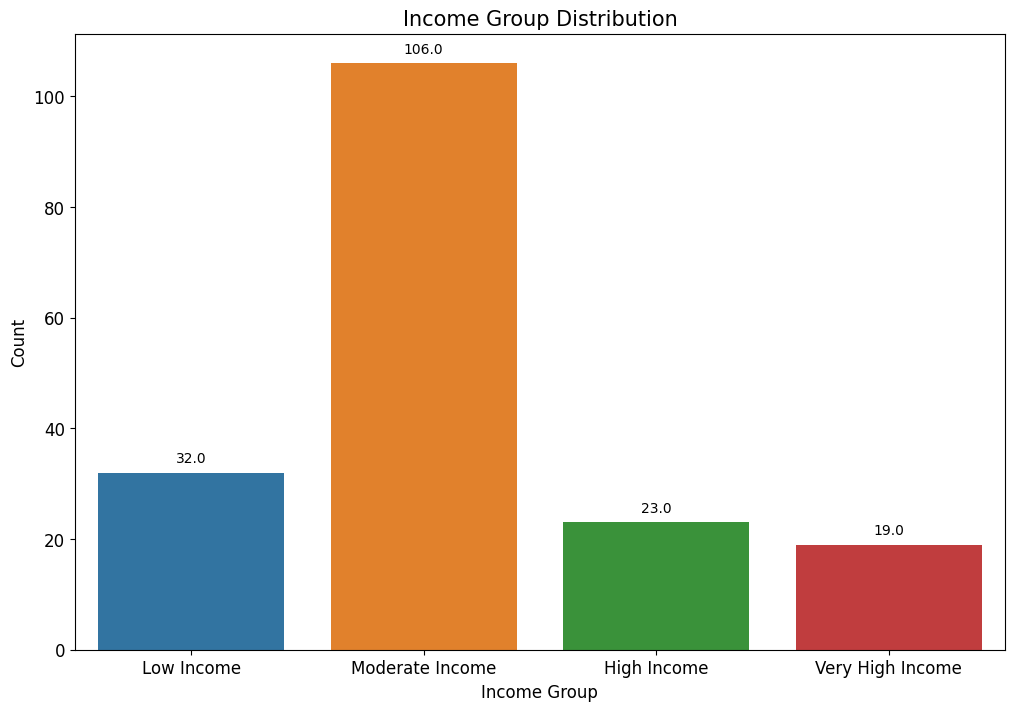

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='income_group',data=df_final, hue= 'income_group')
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Income Group Distribution', fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
#Insights: 106 Users belong to moderate income group of 40 to 60 K
Percentage_of_moderate_income_user = round((106/len(df_final))*100,1)
print(Percentage_of_moderate_income_user)

58.9


In [ ]:
Percentage_of_low_income_user = round((32/len(df_final))*100,1)
print(Percentage_of_low_income_user)
#insight : Nearly 78% User have less than 60 K Income

17.8


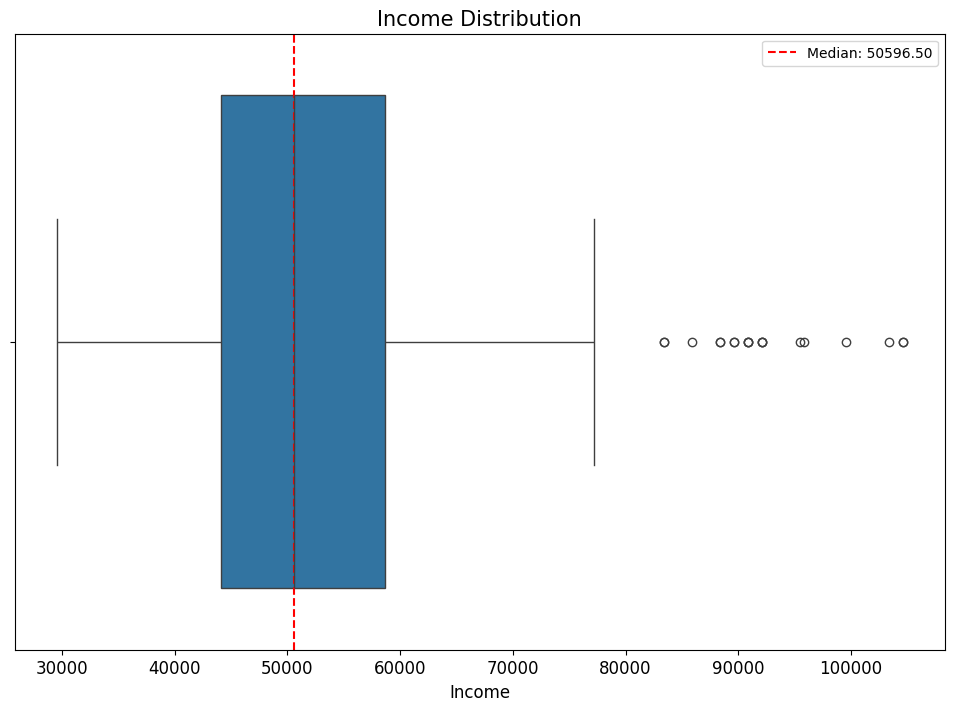

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Income',data=df_final)
plt.xlabel('Income', fontsize=12)

# Calculate the mean of the 'Income' column
income_median = df_final['Income'].median()

# Display the mean on the plot using axvline
plt.axvline(income_median, color='r', linestyle='--', label=f'Median: {income_median:.2f}')
plt.legend() # Show the legend

plt.xticks(fontsize=12)
plt.title('Income Distribution', fontsize=15)
plt.show()

In [ ]:
#Insight: Income data has many outliers

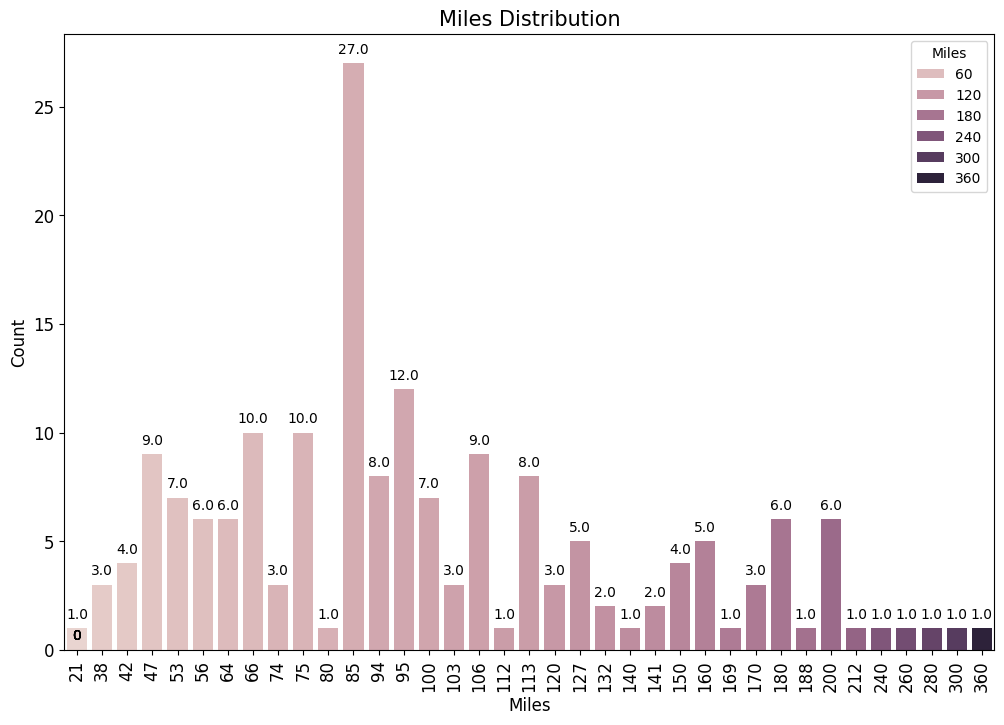

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Miles',data=df_final, hue= 'Miles')
plt.xlabel('Miles', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.title('Miles Distribution', fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

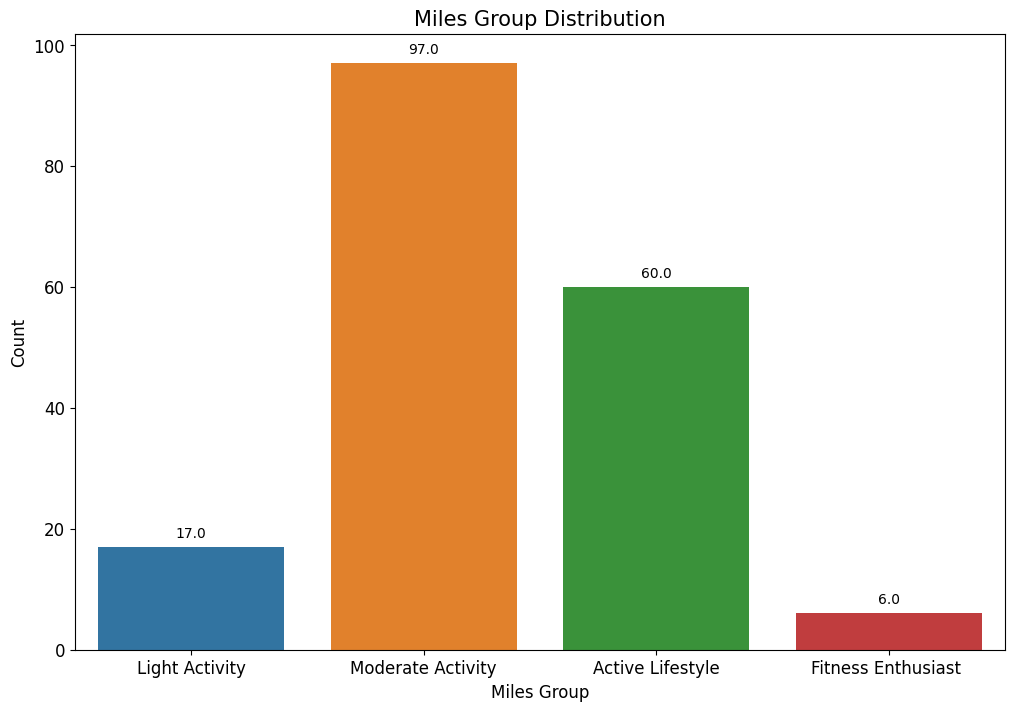

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='miles_group',data=df_final, hue= 'miles_group')
plt.xlabel('Miles Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Miles Group Distribution', fontsize=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
# 157 user want use treadmill between 50 to 200 miles per week
Percentage_of_user_want_to_use_treadmill_between_50_to_200_miles = round((157/len(df_final))*100,1)
print(Percentage_of_user_want_to_use_treadmill_between_50_to_200_miles)

87.2


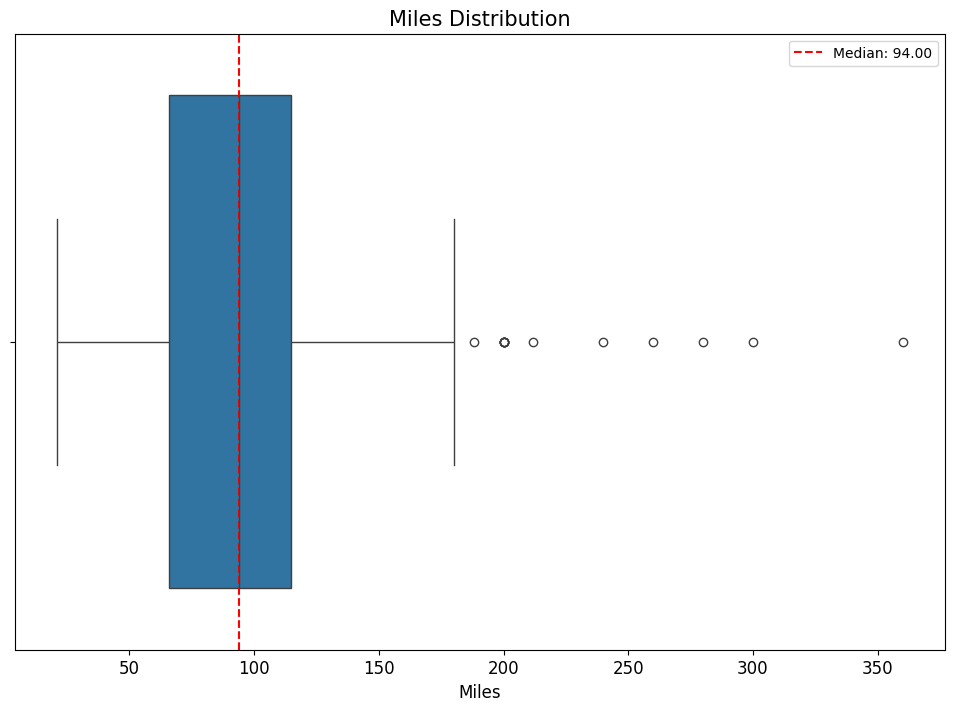

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'Miles',data=df_final)
plt.xlabel('Miles', fontsize=12)

# Calculate the mean of the 'Miles' column
miles_median = df_final['Miles'].median()

# Display the mean on the plot using axvline
plt.axvline(miles_median, color='r', linestyle='--', label=f'Median: {miles_median:.2f}')
plt.legend() # Show the legend

plt.xticks(fontsize=12)
plt.title('Miles Distribution', fontsize=15)
plt.show()

In [ ]:
#Insight : 8 outliers and 94 is median

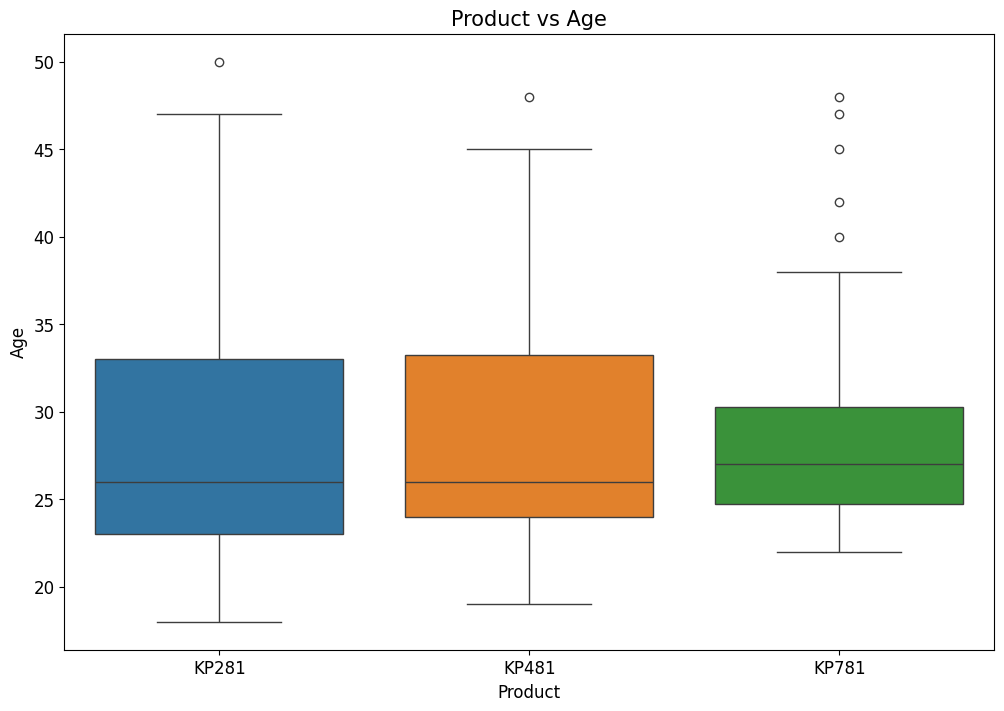

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Product',y='Age',hue='Product',data=df_final)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Product vs Age', fontsize=15)
plt.show()

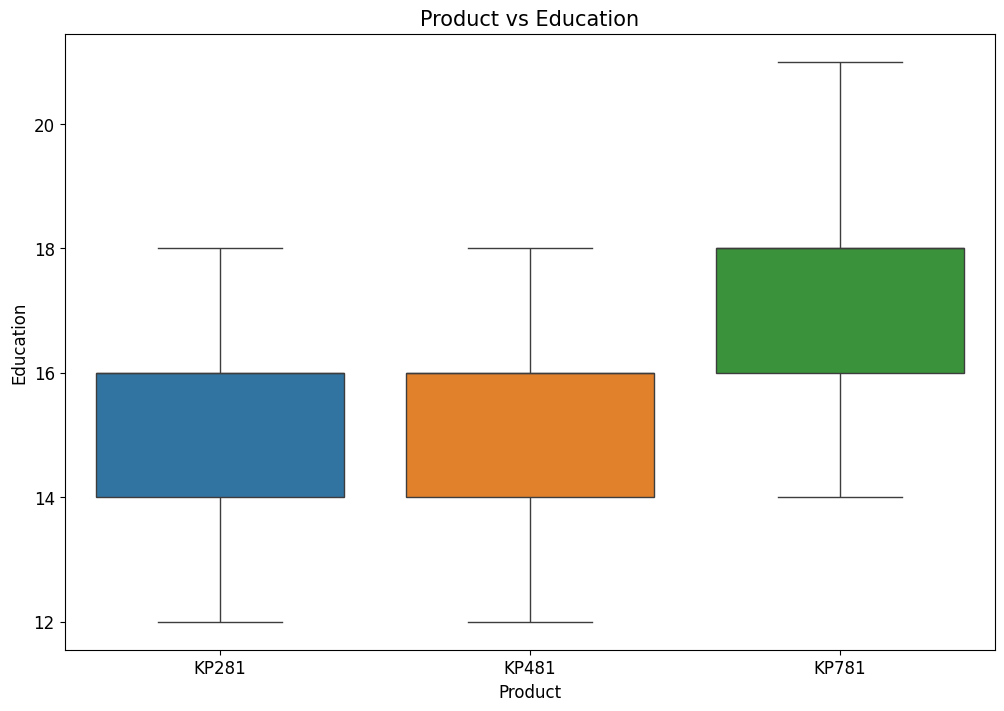

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Product',y='Education',hue='Product',data=df_final)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Education', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Product vs Education', fontsize=15)
plt.show()

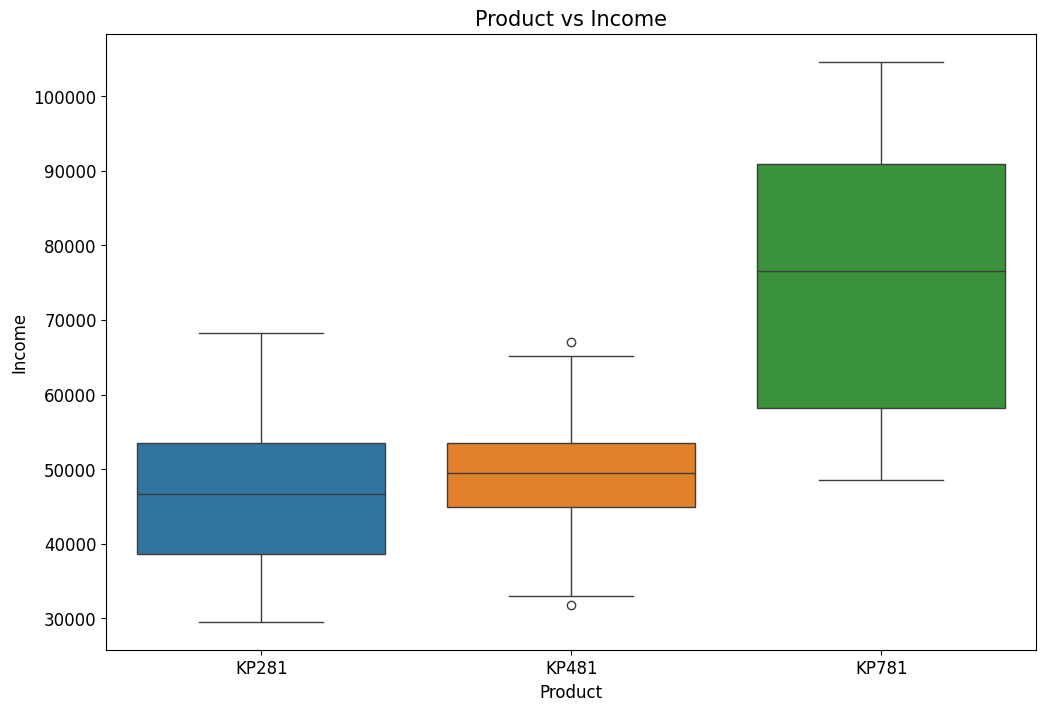

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Product',y='Income',hue='Product',data=df_final)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Product vs Income', fontsize=15)
plt.show()

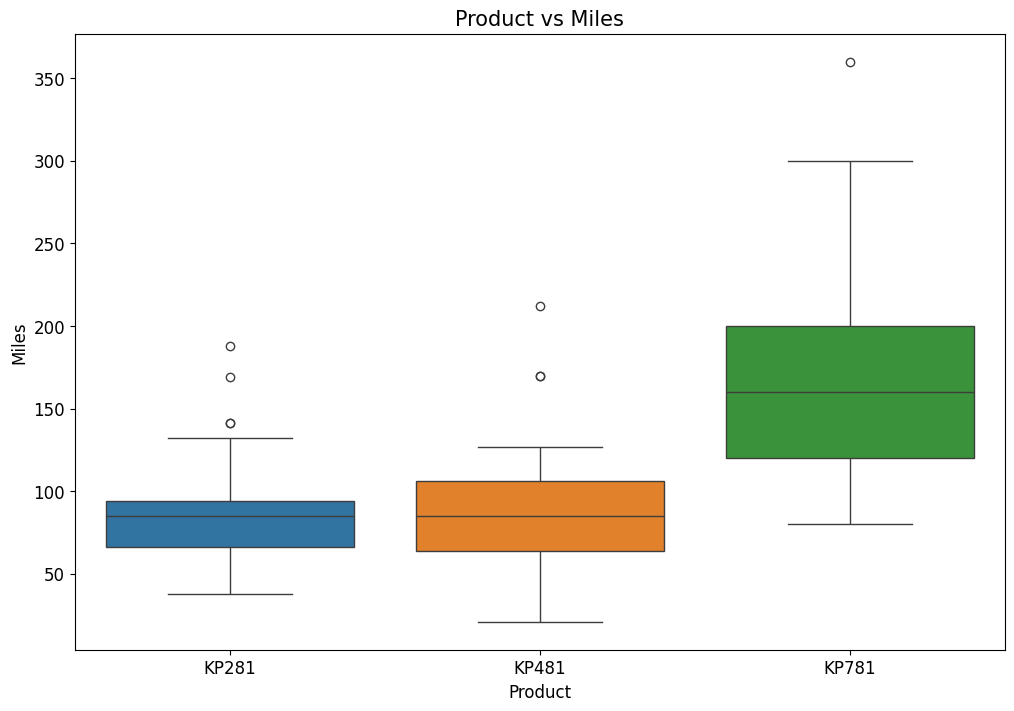

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Product',y='Miles',hue='Product',data=df_final)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Miles', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Product vs Miles', fontsize=15)
plt.show()

In [ ]:
#Insights : above clearly shows a strong preference for the treadmill model KP781 among user who have higher education,
# higher income levels, and intend to engage in running activities exceeding 150 miles per week.

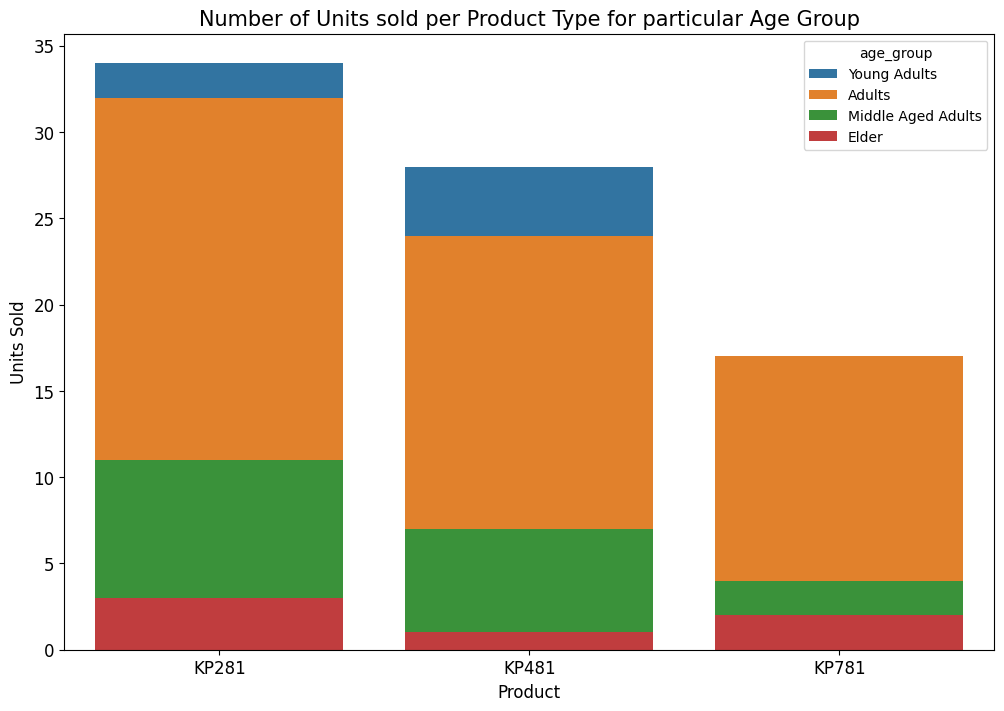

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Product',data=df_final, hue= 'age_group', dodge= False )
plt.xlabel('Product', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Units sold per Product Type for particular Age Group', fontsize=15)


plt.show()

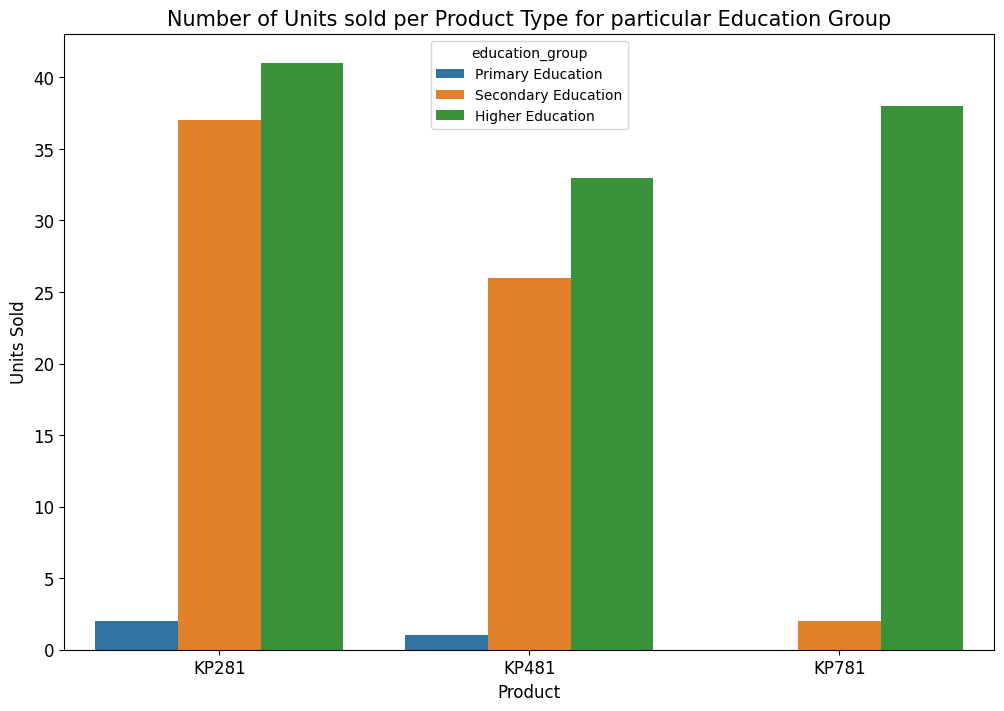

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Product',data=df_final, hue= 'education_group', dodge= True )
plt.xlabel('Product', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Units sold per Product Type for particular Education Group', fontsize=15)


plt.show()

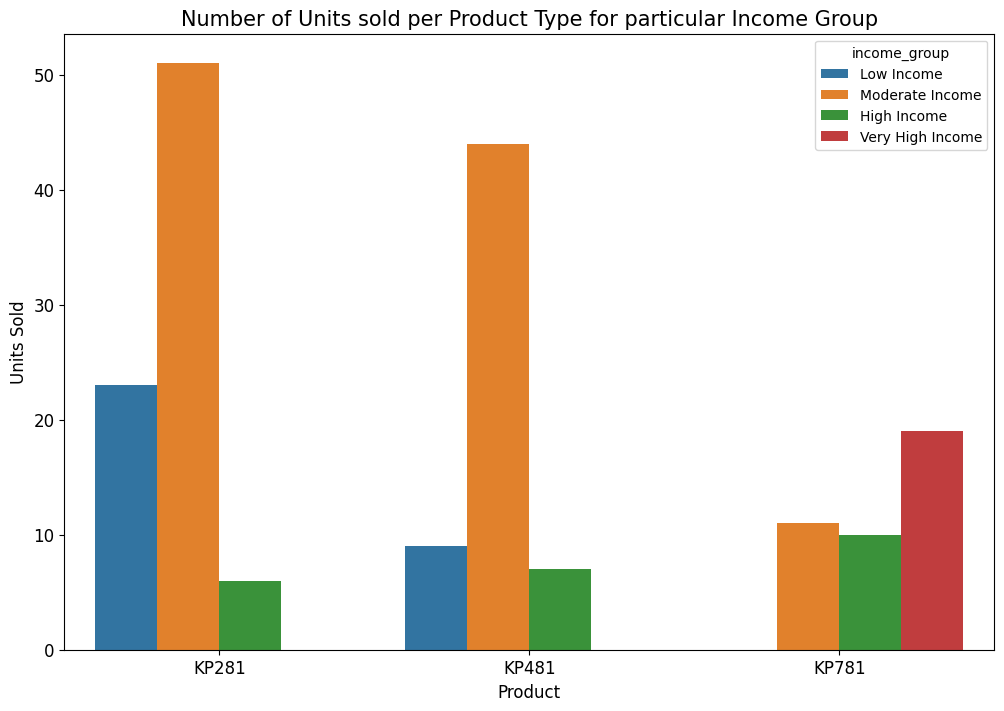

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Product',data=df_final, hue= 'income_group', dodge= True )
plt.xlabel('Product', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Units sold per Product Type for particular Income Group', fontsize=15)


plt.show()

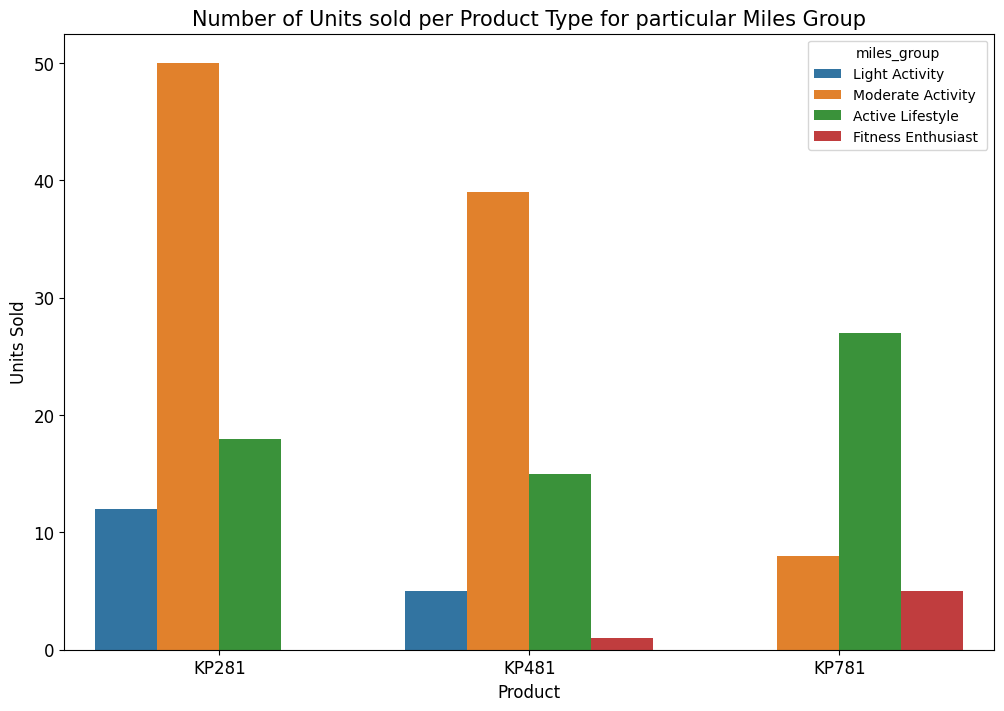

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Product',data=df_final, hue= 'miles_group', dodge= True )
plt.xlabel('Product', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Units sold per Product Type for particular Miles Group', fontsize=15)


plt.show()

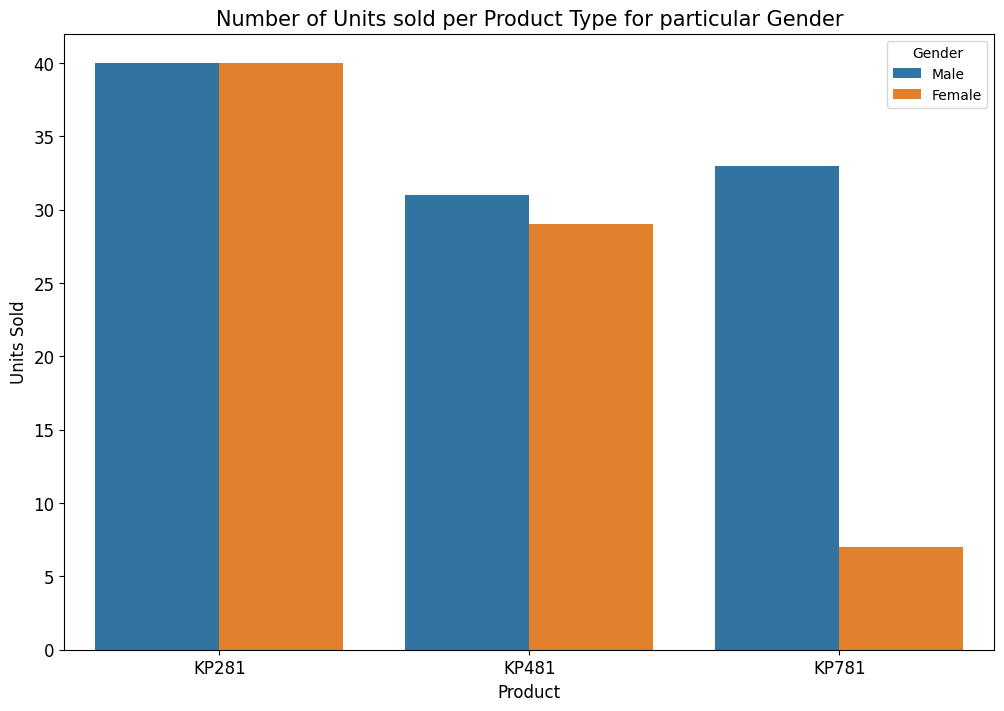

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Product',data=df_final, hue= 'Gender', dodge= True )
plt.xlabel('Product', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Units sold per Product Type for particular Gender', fontsize=15)


plt.show()

In [ ]:
#Insights : (1) Treadmill model KP781 is preferred more by male User.

# (2) Both treadmill models, KP481 and KP281, show equal distribution of both the gender

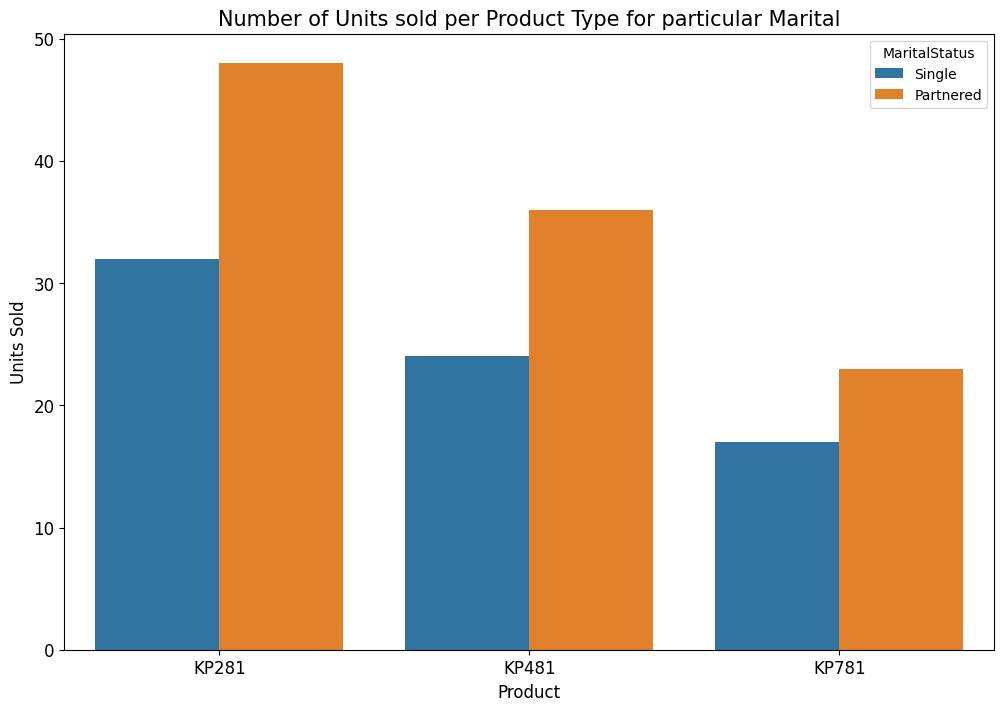

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Product',data=df_final, hue= 'MaritalStatus', dodge= True )
plt.xlabel('Product', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Units sold per Product Type for particular Marital', fontsize=15)


plt.show()

In [ ]:
#Insights For all the three treadmill models, there is uniform distribution of Married and Single customers with married customers showing slighly higher preference

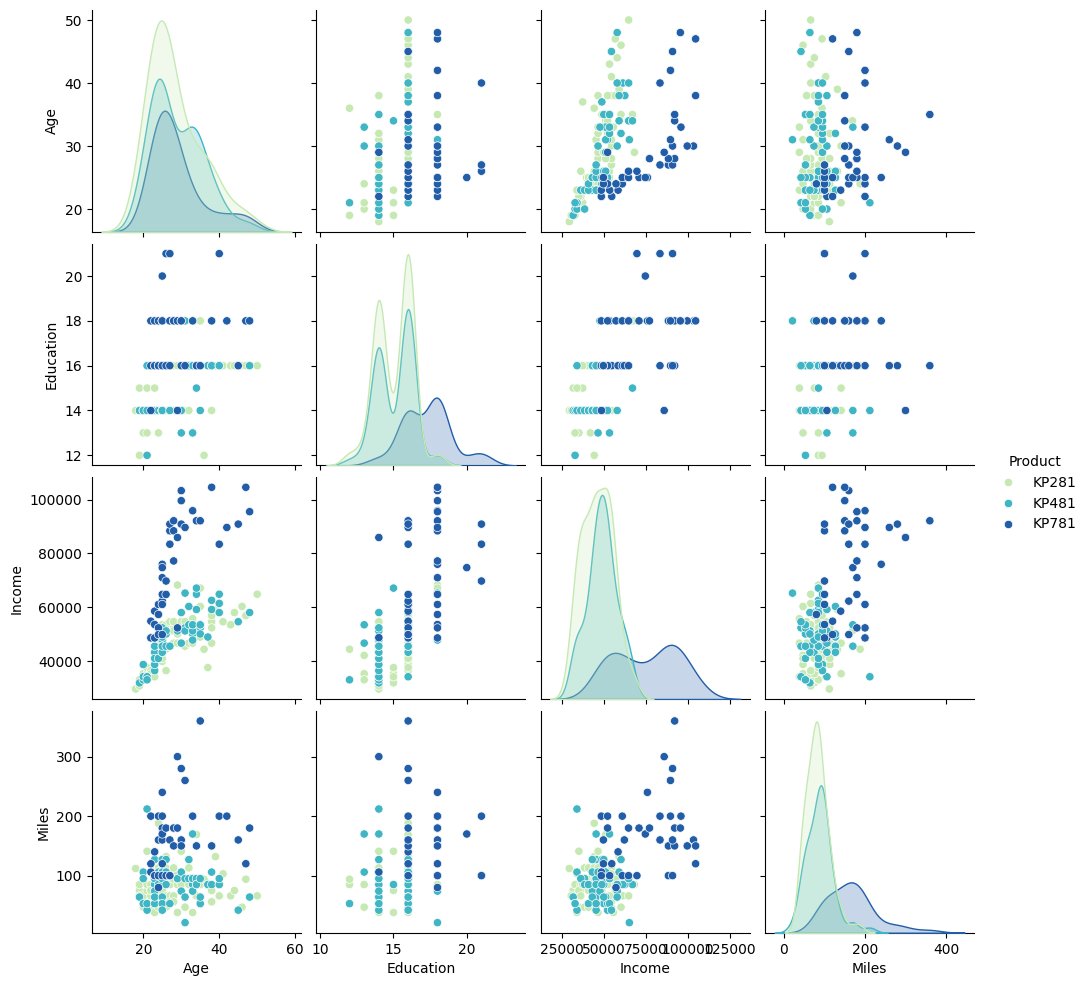

In [ ]:
sns.pairplot(df_final[['Age', 'Education','Income','Miles', 'Product']], hue ='Product', palette= 'YlGnBu') # Include 'Product' column in the DataFrame selection
plt.show()

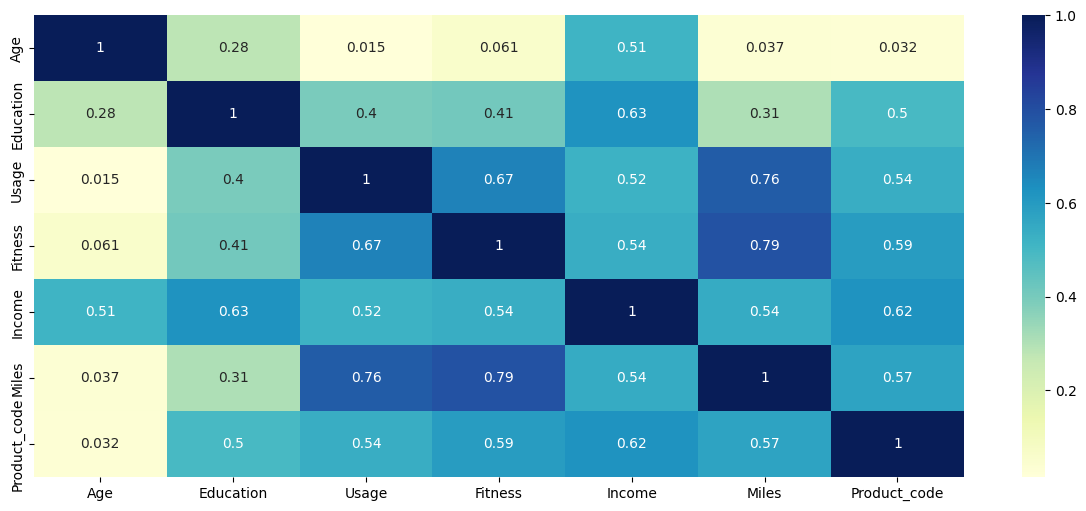

In [ ]:
# Convert 'Product' column to numeric using category codes
df_final['Product_code'] = df_final['Product'].astype('category').cat.codes

# Calculate the correlation matrix using only numeric columns, including the new 'Product_code'
corr_mat = df_final[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles', 'Product_code']].corr()

# Continue with creating the heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")
plt.show()


In [ ]:
# Probability of product purchase w.r.t. gender
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


In [ ]:
# The Probability of a treadmill being purchased by a female is 42%.

#The conditional probability of purchasing the treadmill model given that the customer is female is

# For Treadmill model KP281 - 22%

# For Treadmill model KP481 - 16%

# For Treadmill model KP781 - 4%

# The Probability of a treadmill being purchased by a male is 58%.

# The conditional probability of purchasing the treadmill model given that the customer is male is -

# For Treadmill model KP281 - 22%

# For Treadmill model KP481 - 17%

# For Treadmill model KP781 - 18%

In [ ]:
#  Probability of product purchase w.r.t. Age
pd.crosstab(index =df['Product'],columns = df['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


In [ ]:
# Probability of product purchase w.r.t. Education level
pd.crosstab(index =df['Product'],columns = df['education_group'],margins = True,normalize = True ).round(2)

education_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


In [ ]:
# Probability of product purchase w.r.t. Income
pd.crosstab(index =df['Product'],columns = df['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


In [ ]:
# Probability of product purchase w.r.t. Marital Status
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


In [ ]:
# Probability of product purchase w.r.t. Weekly Usage
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


In [ ]:
# Probability of product purchase w.r.t. Customer Fitness
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


In [ ]:
# Probability of product purchase w.r.t. weekly mileage
pd.crosstab(index =df['Product'],columns = df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00
